In [2]:
import os
import pandas as pd
import numpy as np
import re
from json import load
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=2)

plot_infos = {
    'sudoku':{
        'marker':'o',
        'color':'red'
    },
    'cluster':{
        'marker':'s',
        'color':'red'
    },
    'menage':{
        'marker':'+',
        'color':'blue'
    },
    'cars':{
        'marker':'x',
        'color':'lime'
    },
    'queens':{
        'marker':'*',
        'color':'green'
    },
    'langford':{
        'marker':'o',
        'color':'orange'
    },
    'ex':{
        'marker':'s',
        'color':'black'
    },
    'graceful':{
        'marker':'+',
        'color':'purple'
    }
}

# markers list : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
# color list : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [2]:
results_dir = 'results'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)

df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-sparse-sets']
print(knuth)
print(solnon)



                                              command        mean    stddev  \
0   cat dlx2_sudoku4x4_1.txt | timeout 10m ../bin/...    0.005993  0.000319   
2     cat dlx2_cluster3.txt | timeout 10m ../bin/dlx2    0.067365  0.000318   
4     cat dlx2_menage12.txt | timeout 10m ../bin/dlx2    5.600897  0.053712   
6   cat dlx2_cars-7-5-5-8.txt | timeout 10m ../bin...  600.015002  0.002497   
8     cat dlx2_menage13.txt | timeout 10m ../bin/dlx2   72.403524  0.148450   
10    cat dlx2_sudoku_a.txt | timeout 10m ../bin/dlx2    0.006315  0.000307   
12  cat dlx2_cluster2.txt | timeout -s INT 10m ../...    0.013590  0.003897   
14  cat dlx2_queens15.txt | timeout 10m ../bin/dlx...   10.007629  0.080014   
16  cat dlx2_langford15.txt | timeout 10m ../bin/dlx2  216.675253  0.600826   
18  cat dlx2_menage14.txt | timeout 10m ../bin/dlx...  600.012391  0.002654   
20  cat dlx2_langford12.txt | timeout 10m ../bin/dlx2    0.515831  0.001358   
22  cat dlx2_queens12.txt | timeout 10m ../bin/dlx..

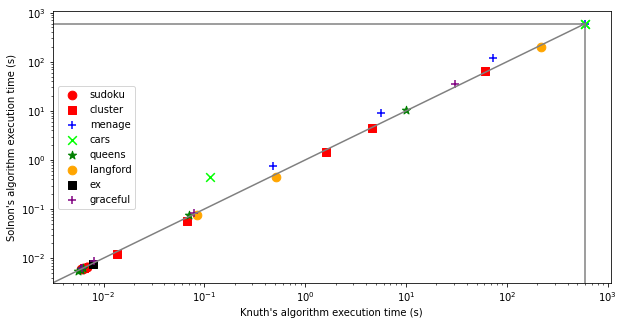

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [9]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['mean'], s['mean'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("Knuth's algorithm execution time (s)")
plt.ylabel("Solnon's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

In [25]:

results_dir = 'results_car'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)
results_dir = 'results_car2'
names = os.listdir(results_dir)
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)
df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-sparse-sets']
print(knuth)
print(solnon)

                                                command       mean    stddev  \
0     cat dlx2_cars467.txt | timeout 300s ../bin/dlx...   0.060276  0.000685   
2     cat dlx2_cars208.txt | timeout 300s ../bin/dlx...   0.029003  0.000274   
4     cat dlx2_cars290.txt | timeout 300s ../bin/dlx...   0.204932  0.007330   
6     cat dlx2_cars39.txt | timeout 300s ../bin/dlx2...   0.034957  0.000622   
8     cat dlx2_cars259.txt | timeout 300s ../bin/dlx...   0.001512  0.000073   
...                                                 ...        ...       ...   
1930  cat dlx2_cars738.txt | timeout 300s ../bin/dlx...  38.096619  0.536143   
1932  cat dlx2_cars1.txt | timeout 300s ../bin/dlx2 ...  48.195055  1.394339   
1934  cat dlx2_cars640.txt | timeout 300s ../bin/dlx...  29.832566  0.584858   
1936  cat dlx2_cars757.txt | timeout 300s ../bin/dlx...  22.629377  0.031432   
1938  cat dlx2_cars214.txt | timeout 300s ../bin/dlx...  11.031624  0.307465   

         median       user    system   

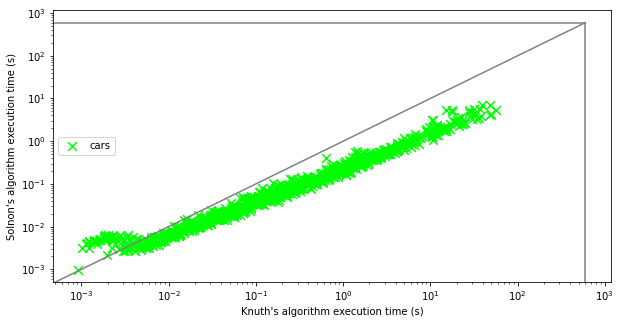

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [26]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['mean'], s['mean'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("Knuth's algorithm execution time (s)")
plt.ylabel("Solnon's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

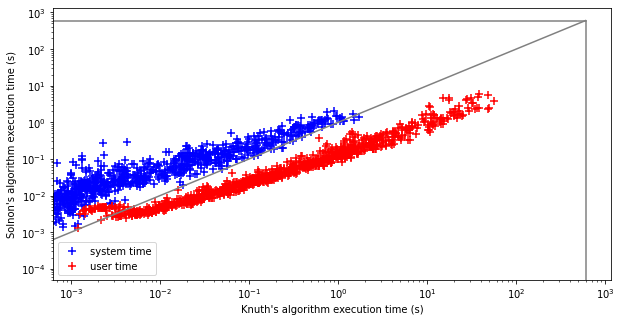

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [27]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['system'], s['system'], c = "blue",marker= "+",label = "system time",s=75.0)
    plt.scatter(k['user'], s['user'], c = "red",marker= "+",label = "user time",s=75.0)
plt.legend()
plt.xlabel("Knuth's algorithm execution time (s)")
plt.ylabel("Solnon's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars_separated.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")

In [ ]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['system'], s['system'], c = "blue",marker= "+",label = "system time",s=75.0)
    plt.scatter(k['user'], s['user'], c = "red",marker= "+",label = "user time",s=75.0)
plt.legend()
plt.xlabel("Knuth's algorithm execution time (s)")
plt.ylabel("Solnon's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.savefig('knuth_vs_solnon_cars_separated.jpg')
plt.show()


print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")65